In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

**2. We have seen that in p = 2 dimensions, a linear decision boundary
takes the form β 0 +β 1 X 1 +β 2 X 2 = 0. We now investigate a non-linear
decision boundary.
(a) Sketch the curve
(1 + X 1 ) 2 + (2 − X 2 ) 2 = 4.
(b) On your sketch, indicate the set of points for which
(1 + X 1 ) 2 + (2 − X 2 ) 2 > 4,
as well as the set of points for which
(1 + X 1 ) 2 + (2 − X 2 ) 2 ≤ 4.(c) Suppose that a classifier assigns an observation to the blue class
if
(1 + X 1 ) 2 + (2 − X 2 ) 2 > 4,
and to the red class otherwise. To what class is the observation
(0,0) classified? (−1,1)? (2,2)? (3,8)?**

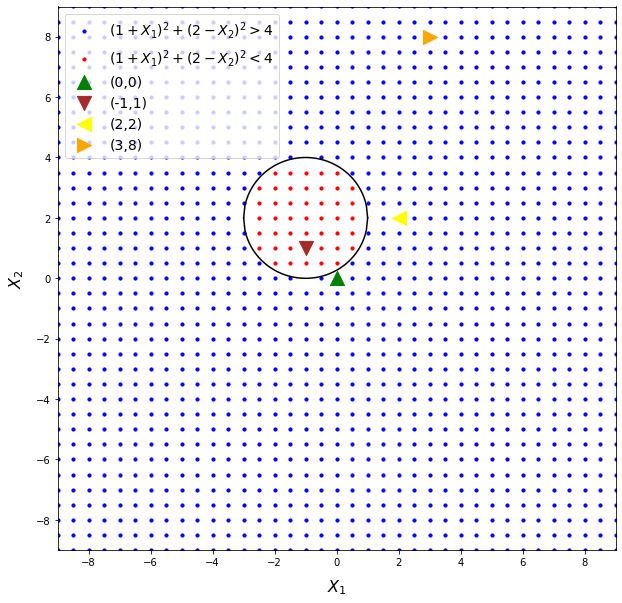

In [2]:
plt.figure(figsize=(10, 10))
X1 = np.linspace(-3,1,100)
X2_positive = (4 - (X1 + 1) ** 2) ** 0.5 + 2
X2_negative = - (4 - (X1 + 1) ** 2) ** 0.5 + 2
XX, YY = np.meshgrid(np.arange(-10,10,0.5), np.arange(-10,10,0.5))
plt.plot(X1,X2_positive,'k-')
plt.plot(X1,X2_negative,'k-')
z = ((1 + XX.ravel()) ** 2 + (2 - YY.ravel()) ** 2> 4)
plt.scatter(XX.ravel()[z],YY.ravel()[z],marker = 'o',s = 10 ,color = 'blue',label = '$(1+ X_1)^2 + (2 - X_2)^2 > 4$')
z = ((1 + XX.ravel()) ** 2 + (2 - YY.ravel()) ** 2< 4)
plt.scatter(XX.ravel()[z],YY.ravel()[z],marker = 'o',s = 10 ,color = 'red',label = '$(1+ X_1)^2 + (2 - X_2)^2 < 4$')
plt.scatter(0,0,marker = '^',s = 200,color = 'green',label = '(0,0)')
plt.scatter(-1,1,marker = 'v',s = 200,color = 'brown',label = '(-1,1)')
plt.scatter(2,2,marker = '<',s = 200,color = 'yellow',label = '(2,2)')
plt.scatter(3,8,marker = '>',s = 200,color = 'orange',label = '(3,8)')
plt.xlim([-9,9])
plt.ylim([-9,9])
plt.xlabel('$X_1$',fontsize = 16,labelpad =10)
plt.ylabel('$X_2$',fontsize = 16,labelpad =10)
plt.legend(fontsize = 14,loc = 'upper left' )
plt.show()

**(d) Argue that while the decision boundary in (c) is not linear in
terms of X 1 and X 2 , it is linear in terms of X 1 , X 2^
1 , X 2 , and
X 2^
2 .**

In [3]:
#利用XX,YY,z可以及SVC = (kernel="linear")可以得出
from sklearn.svm import SVC
X = np.c_[XX.ravel(),YY.ravel()]
svm = SVC(kernel="linear", C = 10)
svm.fit(X,z)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [4]:
from sklearn.metrics import confusion_matrix
z_pred = svm.predict(X)
#python生成的是[['TN','FP']['FN','TP']],与R互倒
svm_pred_table = pd.DataFrame(confusion_matrix(z, z_pred).T,
                             index = svm.classes_,
                             columns = [['Data.test','Data.test'],svm.classes_])
svm_pred_table.columns.names = ['','svc.pred']
svm_pred_table

Data.test      
svc.pred     False True 
False         1555    45
True             0     0

可以看出使用线性预测，划分不准确，代表对X1,X2数据不可以线性划分

In [5]:
X = np.c_[XX.ravel(),YY.ravel(),XX.ravel() ** 2,YY.ravel() ** 2]
svm = SVC(kernel="linear", C = 10)
svm.fit(X,z)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [6]:
z_pred = svm.predict(X)
#python生成的是[['TN','FP']['FN','TP']],与R互倒
svm_pred_table = pd.DataFrame(confusion_matrix(z, z_pred).T,
                             index = svm.classes_,
                             columns = [['Data.test','Data.test'],svm.classes_])
svm_pred_table.columns.names = ['','svc.pred']
svm_pred_table

Data.test      
svc.pred     False True 
False         1555     0
True             0    45

对于X1,X2,X1^2,X2^2此时线性划分可用